<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    808 non-null    object 
 1   actual_price    808 non-null    int64  
 2   discount_price  808 non-null    int64  
 3   stars           808 non-null    float64
 4   rating          808 non-null    int64  
 5   reviews         808 non-null    int64  
 6   description     808 non-null    object 
 7   link            808 non-null    object 
 8   brand           808 non-null    object 
 9   cpu_brand       808 non-null    object 
 10  ram_size        808 non-null    int64  
 11  ram_type        808 non-null    object 
 12  Storage         790 non-null    object 
 13  os              808 non-null    object 
 14  display_size    808 non-null    object 
 15  warranty        799 non-null    object 
 16  warranty_type   799 non-null    object 
dtypes: float64(1), int64(5), object(11)

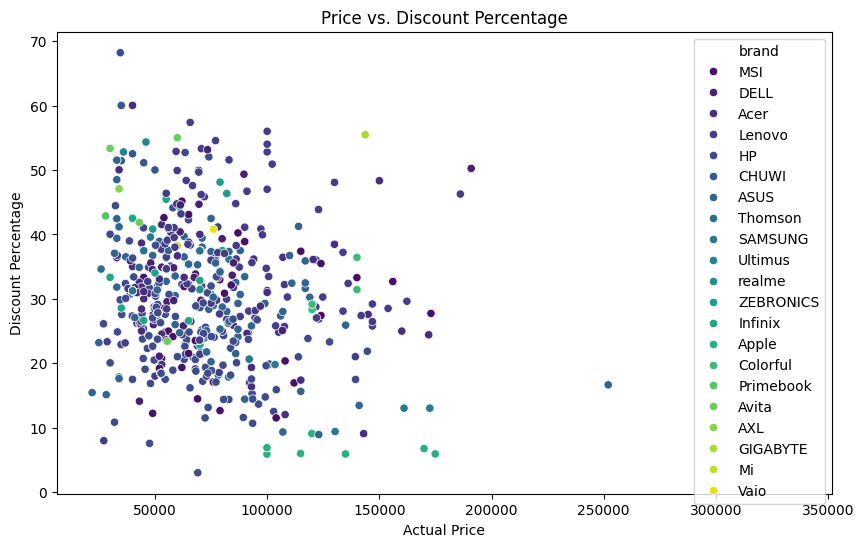

<ipython-input-6-29e70e374d07>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')


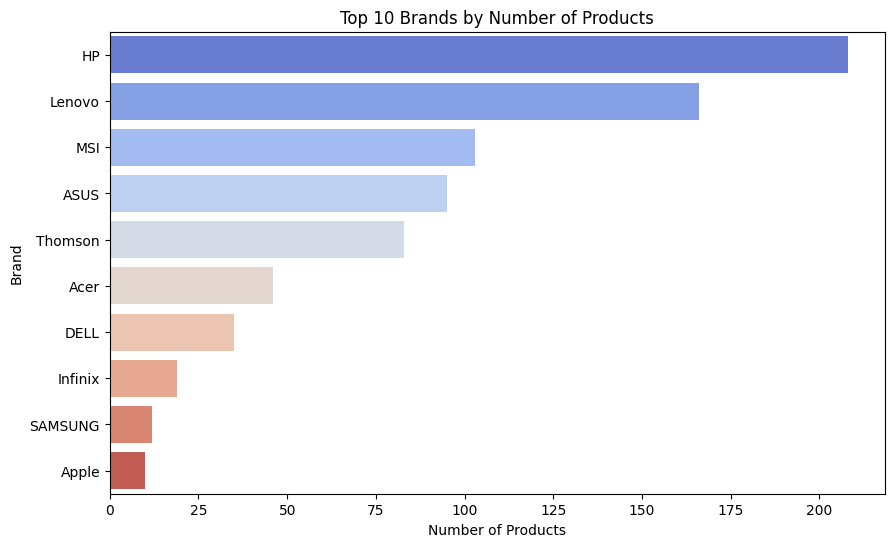

<ipython-input-6-29e70e374d07>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_brand.values, y=avg_rating_brand.index, palette='magma')


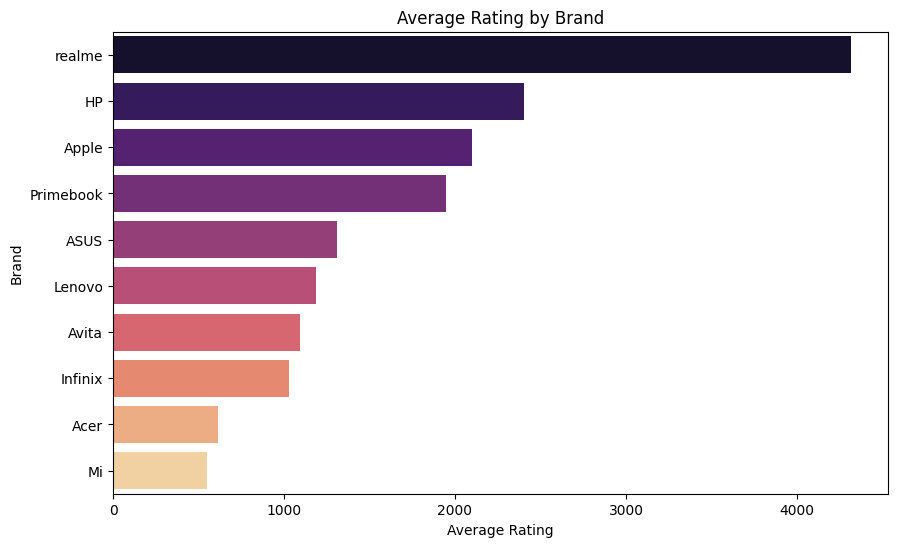

<ipython-input-6-29e70e374d07>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ram_size_counts.index, y=ram_size_counts.values, palette='pastel')


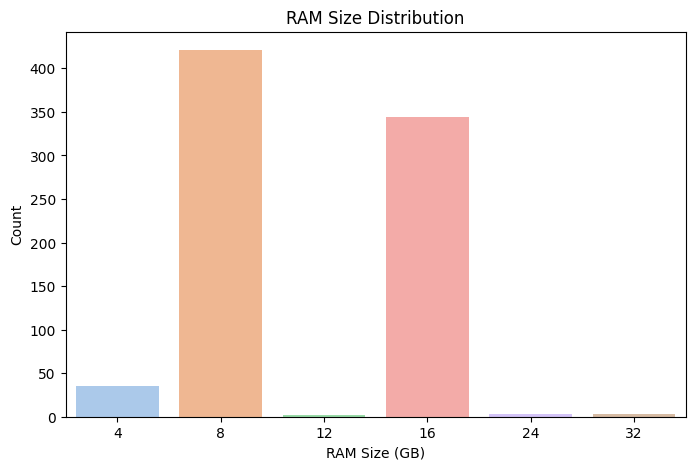

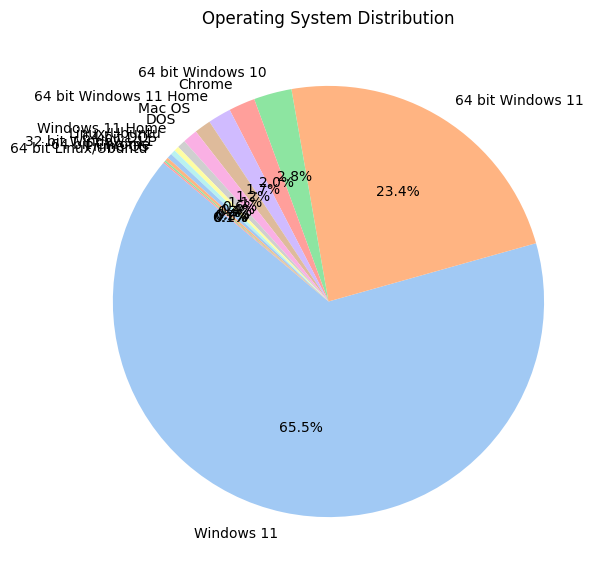

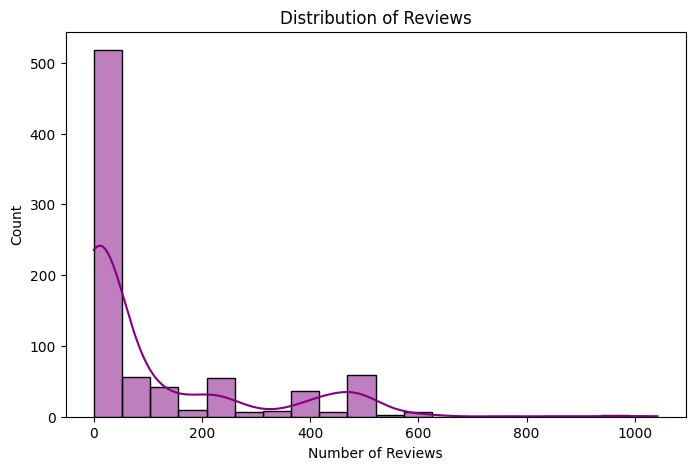

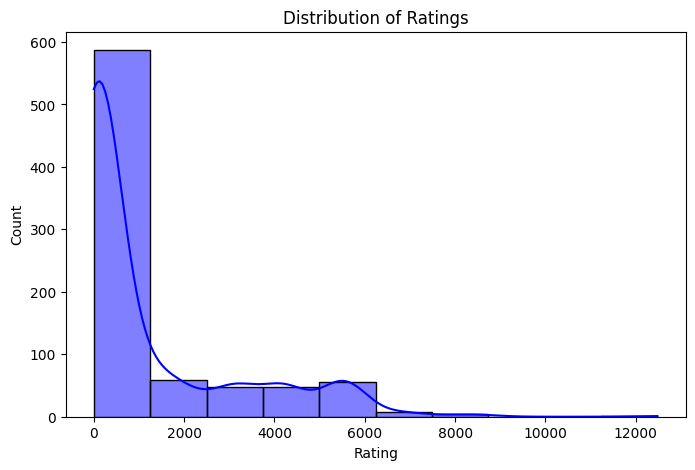

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("flipkart dataset.csv")

# Display basic info and first few rows
print(df.info())
print(df.head())

# 1. Data Cleaning and Preparation

# Handle missing values
df.fillna("Unknown", inplace=True)  # Or use specific strategies for critical columns

# Convert relevant columns to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Calculate discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# Drop rows with NaNs in critical columns
df.dropna(subset=['actual_price', 'discount_price', 'rating'], inplace=True)

# 2. Exploratory Data Analysis (EDA)

# Price vs. Discount Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discount_percentage', hue='brand', palette='viridis')
plt.title("Price vs. Discount Percentage")
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.show()

# Top Brands by Number of Products
top_brands = df['brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

# Average Rating by Brand
avg_rating_brand = df.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_brand.values, y=avg_rating_brand.index, palette='magma')
plt.title("Average Rating by Brand")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()

# RAM Size Distribution
plt.figure(figsize=(8, 5))
ram_size_counts = df['ram_size'].value_counts()
sns.barplot(x=ram_size_counts.index, y=ram_size_counts.values, palette='pastel')
plt.title("RAM Size Distribution")
plt.xlabel("RAM Size (GB)")
plt.ylabel("Count")
plt.show()

# Operating System Distribution
plt.figure(figsize=(7, 7))
os_counts = df['os'].value_counts()
plt.pie(os_counts.values, labels=os_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Operating System Distribution")
plt.show()

# Reviews and Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['reviews'], bins=20, kde=True, color='purple')
plt.title("Distribution of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Save the cleaned data if needed
df.to_csv("cleaned_flipkart_data.csv", index=False)
